### 1. Импорт библиотек и настройка

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import requests as requests
import pandas as pd
import networkx as nx
from networkx import all_pairs_shortest_path_length
from collections import defaultdict

plt.style.use("seaborn");

### 2. Выполнение лабораторной работы №1

#### Часть 2.

##### 1.

In [2]:
N = 3
x = np.random.randint(low = -20, high = 100, size = (N))
w = np.random.uniform(size = (N))
b = np.random.randint(low = 2, high = 10)

print(x)
print(w)
print(b)

[ 93 -20  84]
[0.08316952 0.32873204 0.78945784]
3


In [3]:
result = np.dot(x, w) + b

result

70.47458280998339

In [4]:
def verification_function(x, w, b):
    summed = 0
    
    for x, w in zip(x, w):
        summed += x * w
        
    return (summed + b)

In [5]:
verification_function(x, w, b)

70.47458280998339

##### 2.

In [6]:
def function_f(x):
    return x - (x ** 3) / 6 + (x ** 5) / 120 - (x ** 7) / 5040

def function_g(x):
    return np.sin(x)

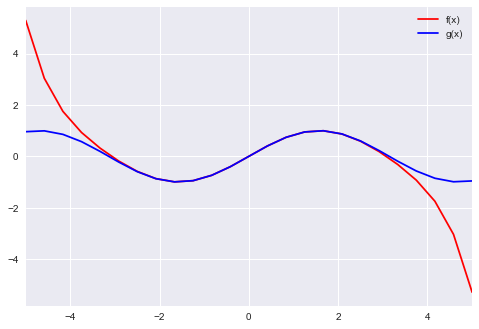

In [7]:
a, b = -5, 5
data = np.linspace(a, b, num = 25) 

plt.plot(data, function_f(data), label = "f(x)", color = "red");
plt.plot(data, function_g(data), label = "g(x)", color = "blue");
plt.xlim(a, b);
plt.legend(loc = "upper right");

##### 3.

In [9]:
r = float(input("Введите радиус: "))

Введите радиус:  0.2


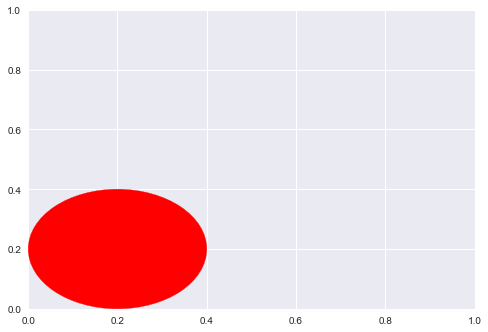

In [10]:
circle = plt.Circle((r, r), 0.2, color='r')

fig, ax = plt.subplots() 

ax.add_artist(circle)

##### 4.

In [40]:
def transformation_plot(points, matrix):
    x = points[:, 0]
    y = points[:, 1]
    
    color = dot(x, y)
    
    ax[0].scatter(x, y, 100, c = color)
    
    transformated_points = np.dot(points, matrix.T)
    
    transformated_x = transformated_points[:, 0]
    transformate_y = transformated_points[:, 1]
    
    ax[1].scatter(transformated_x, transformate_y, 100, c = color)
    
def dot(x, y):
        return x * y

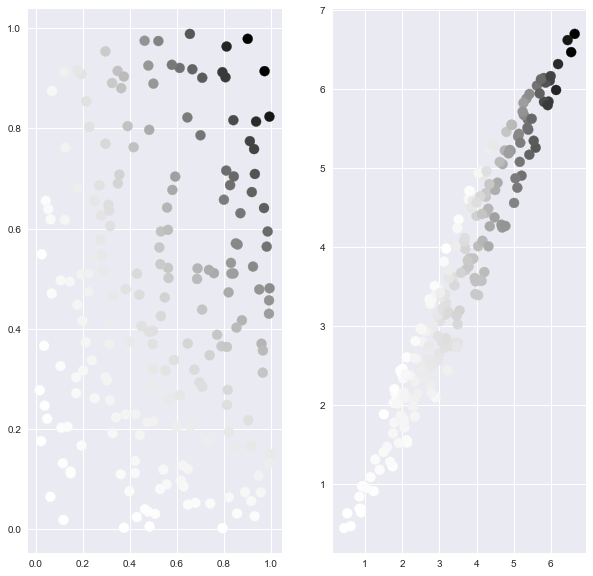

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

transformation_plot(np.random.random(size=(200, 2)), np.array([[4,3],[5,2]]))

##### 5.

In [5]:
def function(x):
    return np.sin(x)

def deriviation(x, delta_x = 0.0001):
    return (function(x + delta_x) - function(x)) / delta_x

def deriviation_function(x):
    return np.cos(x)

In [6]:
data = np.linspace(-10, 10, 50)

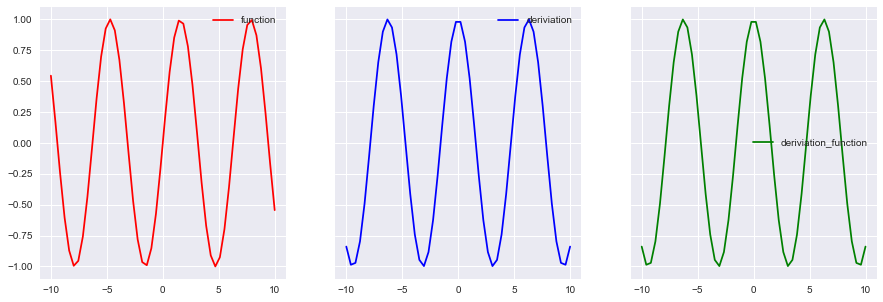

In [18]:
fig, axes = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (15, 5))

axes[0].plot(data, function(data), label = "function", color = "red")
axes[0].legend(loc = "upper right")

axes[1].plot(data, deriviation(data), label = "deriviation", color = "blue")
axes[1].legend(loc = "upper right")

axes[2].plot(data, deriviation_function(data), label = "deriviation_function", color = "green")
axes[2].legend(loc = "upper right")


plt.legend();

##### 7.

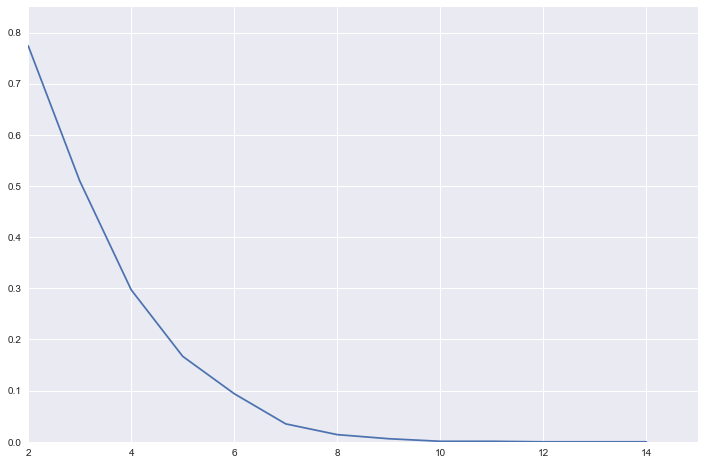

In [66]:
ans = []
for i in range(2, 15):
    incircle = 0
    points = np.random.random(size=(1000, i))
    for point in points:
        if 1 >= sum([x**2 for x in point]):
            incircle += 1
    ans.append(incircle/1000)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim(0, 0.85)
ax.set_xlim(2, 15)
ax.plot(range(2, 15), ans, 100)
pass

##### 8.

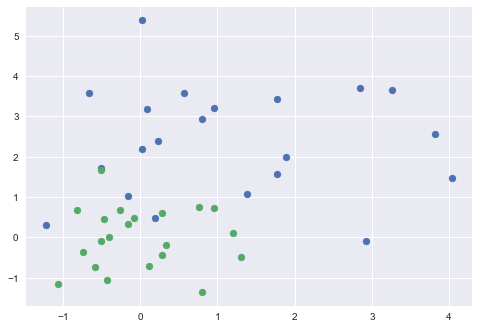

In [65]:
def foo(mat):
    for k in range(mat.shape[1]):
        col = mat[:,k]
        avg = np.mean(col)
        dis = sum((num - avg)**2 for num in col)/len(col)
        for i in range(mat.shape[0]):
            mat[i,k] = (mat[i,k] - avg)/dis
a = np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]])
for i in range(20):
    a = np.vstack([a, np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]])])
fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1])
foo(a)
ax.scatter(a[:,0], a[:,1])
pass

##### 9.a)

##### 9.б)

In [53]:
underestimated_count_for_var = 0 # Недооценённое количество раз для некорректной формулы
exceeded_count_for_var = 0; # Превышенное количество раз для некорректной формулы
exceeded_count_for_correct_var = 0 # Превышенное количество раз для корректной формулы
underestimated_count_for_correct_var = 0 # Недооценённое количество раз для корректной формулы

In [56]:
def count_for_incorrect_var(incorrect_var):
    global exceeded_count_for_var
    global underestimated_count_for_var
    
    if incorrect_var > 1:
        exceeded_count_for_var +=1 
    elif incorrect_var < 1:
        underestimated_count_for_var +=1
    else:
        pass
    
def count_for_correct_var(correct_var):
    global exceeded_count_for_correct_var
    global underestimated_count_for_correct_var
    
    if correct_var > 1:
        exceeded_count_for_correct_var +=1 
    elif correct_var < 1:
        underestimated_count_for_correct_var += 1
    else:
        pass
    
def calculate_mse(x):
    summed = 0
    
    for element in x:
        summed += (element - 1) ** 2
    
    return summed / len(x)

In [57]:
incorrect_vars = []
correct_vars = []

for i in range(100):
    data_normal = np.random.normal(size = 20)
    
    incorrect_var = np.var(data_normal)
    correct_var = np.var(data_normal, ddof = 1)
    
    incorrect_vars.append(incorrect_var)
    correct_vars.append(correct_var)
    
    count_for_incorrect_var(incorrect_var)
    count_for_correct_var(correct_var)
    
print("-" * 20)
print("Количество превышений для некорреткной формулы: {}".format(exceeded_count_for_var))
print("Количество недооцениваний (лол что) для некорреткной формулы: {}".format(underestimated_count_for_var))
print("MSE для некорректной формулы: {}".format(calculate_mse(incorrect_vars)))

print("-" * 20)
print("Количество превышений для корреткной формулы: {}".format(exceeded_count_for_correct_var))
print("Количество недооцениваний (лол что) для корреткной формулы: {}".format(underestimated_count_for_correct_var))
print("MSE для некорректной формулы: {}".format(calculate_mse(correct_vars)))
    

--------------------
Количество превышений для некорреткной формулы: 40
Количество недооцениваний (лол что) для некорреткной формулы: 60
MSE для некорректной формулы: 0.11209485780754903
--------------------
Количество превышений для корреткной формулы: 43
Количество недооцениваний (лол что) для корреткной формулы: 57
MSE для некорректной формулы: 0.12021769301328654


#### Часть 3.

In [52]:
def find_friends():
    global edges
    global nodes
    
    for edge in edges: 
        nodes[edge[0]] += 1
        nodes[edge[1]] += 1

In [54]:
def count():
    for couple in list_couples:
        for count in couple[1].values():
                if count > 0 and count < 7:
                    counts[count-1] += 1
                else: counts[-1] += 1

In [ ]:
graph =  nx.read_gml("VK.gml")

nodes = defaultdict(int)
edges = list(graph.edges)

find_friends()

counts = [0] * 7
list_couples = list(all_pairs_shortest_path_length(graph))

count()

summed = sum(counts)
nodess = sorted(nodes.values(), reverse=True)

print('Число уникальных пользователей:', len(nodes))
print('Среднее число друзей:', round(graph.size() * 2 / len(nodes), 1))
print('Медианное число друзей:', nodess[len(nodess)//2]/2 if len(nodess)%2==1 else \
      (nodess[len(nodess)//2] + nodess[len(nodess) // 2-1])/2)

for i in range(6):
    print('L=' + str(i + 1) + ': ', round(counts[0] / summed, 2))